# 1. Introduction

The airline industry continually seeks innovative strategies to enhance customer loyalty and optimize marketing efforts. This project will delve into a dataset associated with a Canadian airline's Customer Loyalty Program. The dataset consists of data collected during a promotional campaign conducted between February and April 2018.

The primary objectives of this project are:
- Analyzing the impact of the promotional campaign on the enrollment and engagement levels within the loyalty program.
- Analyzing whether certain demographic segments of loyalty members exhibited more interest and engagement with the campaign.
- Assessing the campaign's influence on flight bookings for summer 2018.

# 2. Load libraries

In [1]:
# importing the necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Preprpcessing and Cleaning

In [2]:
#loading the data to dataframe
df1 = pd.read_csv('Customer Loyalty History.csv')
df2 = pd.read_csv('Customer Flight Activity.csv')

In [3]:
df1.head(4)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN


In [4]:
df2.head(4)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0


In [5]:
#data overview
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [6]:
#data overview
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [7]:
#checking for null values
df1.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [8]:
#checking for null values
df2.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [9]:
#stastical summary
df1.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [10]:
#stastical summary
df2.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [11]:
#Checking for duplicate entries
df1[df1.duplicated()]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [12]:
#Checking for duplicate entries
df2[df2.duplicated()]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [13]:
df2.duplicated().sum()

1864

In [14]:
#removing duplicate entries
df2 = df2.drop_duplicates()
df2.shape

(403760, 10)

In [15]:
#renaming field names
df1.rename(columns={'Loyalty Number': 'LoyaltyNumber', 'Postal Code': 'PostalCode', 'Marital Status': 'MaritalStatus', 'Loyalty Card': 'LoyaltyCard', 'Enrollment Type': 'EnrollmentType', 'Enrollment Year': 'EnrollmentYear', 'Enrollment Month': 'EnrollmentMonth', 'Cancellation Year': 'CancellationYear', 'Cancellation Month': 'CancellationMonth'}, inplace=True)

In [16]:
#renaming field names
df2.rename(columns={'Loyalty Number': 'LoyaltyNumber', 'Flights Booked': 'FlightsBooked', 'Flights With Companions': 'FlightsWithCompanions', 'Total Flights': 'TotalFlights', 'Points Accumulated': 'PointsAccumulated', 'Points Redeemed': 'PointsRedeemed', 'Dollar Cost Points Redeemed': 'DollarCostPointsRedeemed' }, inplace=True)

In [17]:
from datetime import datetime

df1['EnrollmentDate'] = pd.to_datetime(df1['EnrollmentYear'] * 100 + df1['EnrollmentMonth'], format='%Y%m')
df1['CancellationDate'] = pd.to_datetime(df1['CancellationYear'] * 100 + df1['CancellationMonth'], format='%Y%m')

In [18]:
df1.head(4)

,LoyaltyNumber,Country,Province,City,PostalCode,Gender,Education,Salary,MaritalStatus,LoyaltyCard,CLV,EnrollmentType,EnrollmentYear,EnrollmentMonth,CancellationYear,CancellationMonth,EnrollmentDate,CancellationDate
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2016-02-01,NaT
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,2016-03-01,NaT
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2014-07-01,2018-01-01
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,2013-02-01,NaT


In [19]:
df2.head(4)

,LoyaltyNumber,Year,Month,FlightsBooked,Flights with Companions,TotalFlights,Distance,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0


# 4. Exploratory Data Analysis :

### Analyzing the impact of the promotional campaign on the loyalty program memberships and Revenue

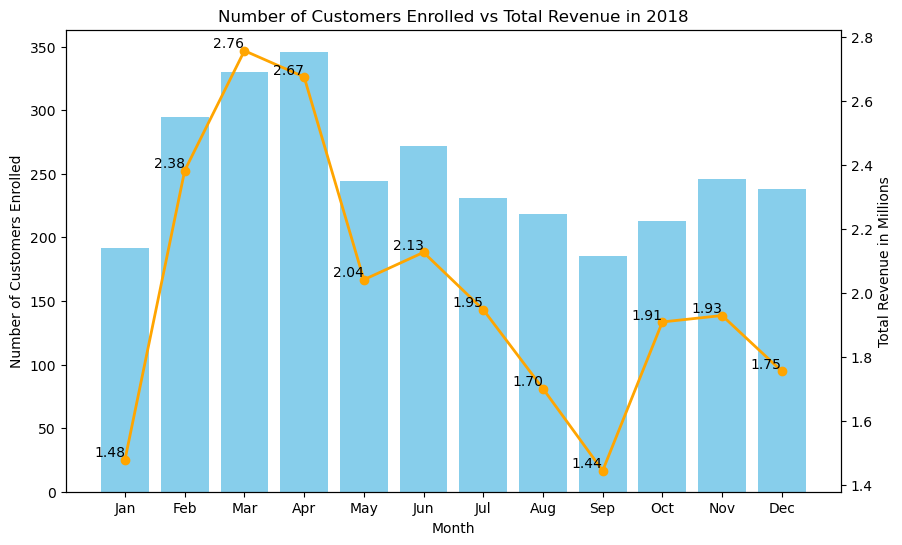

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 contains your dataset

# Filter the dataset for the year 2018
data_2018 = df1[df1['EnrollmentYear'] == 2018]

# Grouping data by month and counting unique enrollments for each month in 2018
enrollments_2018 = data_2018.groupby('EnrollmentMonth')['LoyaltyNumber'].nunique()

# Grouping data by month and summing CLV for each month in 2018
revenue_2018 = data_2018.groupby('EnrollmentMonth')['CLV'].sum()

# Convert revenue values to millions
revenue_2018_millions = revenue_2018 / 1000000  # Dividing by 1,000,000 to represent in millions

# Create a figure and plot the number of customers enrolled
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting number of customers enrolled on the first y-axis (left)
bars = ax1.bar(enrollments_2018.index, enrollments_2018, color='skyblue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Customers Enrolled')
ax1.tick_params(axis='y')

# Add data labels to the bar plot
#for bar in bars:
 #   yval = bar.get_height()
  #  ax1.annotate(f'{yval}', xy=(bar.get_x() + bar.get_width() / 2, yval),
   #              xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Create a secondary y-axis (right) for CLV (revenue)
ax2 = ax1.twinx()
ax2.plot(revenue_2018.index, revenue_2018_millions, color='orange', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Total Revenue in Millions')
ax2.tick_params(axis='y')

# Add data labels for the right y-axis (CLV)
for x, y in zip(revenue_2018.index, revenue_2018_millions):
    ax2.text(x, y, f'{y:.2f}', ha='right', va='bottom')

# Set x-axis ticks to show months as 'Jan', 'Feb', 'Mar', etc.
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(enrollments_2018.index, months)

# Set common x-axis label and title
plt.xlabel('Month')
plt.title('Number of Customers Enrolled vs Total Revenue in 2018')

# Show plot
plt.grid(visible=False)  # Hide gridlines for better clarity
plt.show()


> ***Explanation:***
- Significant spikes in customer enrollments and total revenue are observed in the ***first quarter***. However, these figures hit their lowest points during the third quarter, indicating possible seasonal trends or varying market behaviors.

- The period from ***February to April*** demonstrated the highest numbers for customer enrollments in loyalty programs and total revenue ranginf from ***2.38M to 2.76M***. This indicates the success of marketing campaign during these months.

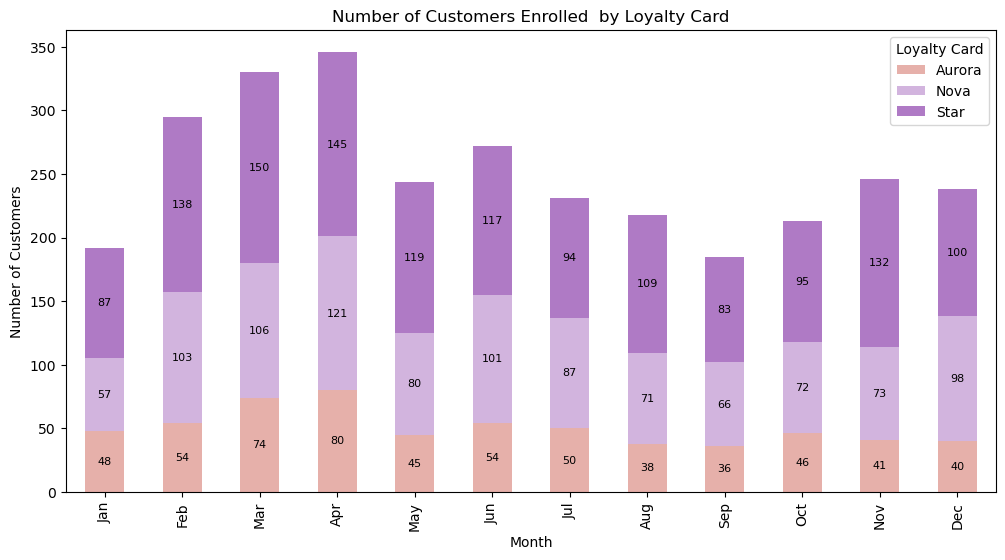

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 contains your dataset

# Filter the dataset for entries enrolled in the year 2018
enrollments_2018 = df1[df1['EnrollmentDate'].dt.year == 2018]

# Grouping enrollments by month and LoyaltyCard to count the number of enrollments per month for each LoyaltyCard type
enrollments_by_month_card = enrollments_2018.groupby([enrollments_2018['EnrollmentDate'].dt.month, 'LoyaltyCard']).size().unstack()

# Define a custom color palette with shades of pink, lavender, and purple
colors = ["#E6B0AA", "#D2B4DE", "#AF7AC5", "#9B59B6", "#5B2C6F", "#BB8FCE", "#E8DAEF", "#BB8FCE"]
#colors = ['steelblue', 'mediumpurple', 'rosybrown']


# Visualizing Number of Customers Enrolled in 2018 by Loyalty Card - Stacked Bar Chart with Custom Colors
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = enrollments_by_month_card.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Adding data labels on each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)

plt.title('Number of Customers Enrolled  by Loyalty Card')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.xticks(range(12), months)
plt.legend(title='Loyalty Card')
plt.show()


> ***Explanation:***
- A noticeable surge in loyalty card enrollments occurred during the months of February to April, accumulating approximately ***346 new customers***. This upsurge strongly indicates the success of a campaign executed during this period.

- The increased number of enrollments in the ***Star membership program*** suggests its popularity, possibly due to its attractive perks and benefits, enticing more individuals to opt for this particular tier.


### Analyzing whether campaign adoption was more successful for certain demographics of loyalty members?

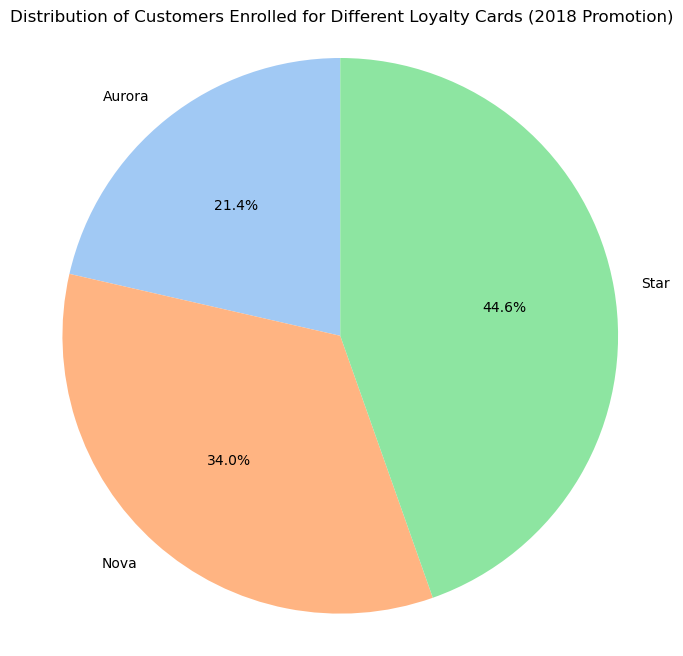

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 contains your dataset

# Filter the dataset for 'EnrollmentType' as '2018 Promotion'
promotion_2018 = df1[df1['EnrollmentType'] == '2018 Promotion']

# Grouping filtered data by Loyalty Card and counting unique customers enrolled
loyalty_card_counts = promotion_2018.groupby('LoyaltyCard')['LoyaltyNumber'].nunique()

# Using a seaborn color palette
colors = sns.color_palette('pastel')

# Plotting a pie chart with seaborn colors for the distribution of customers enrolled for each Loyalty Card
plt.figure(figsize=(8, 8))
plt.pie(loyalty_card_counts, labels=loyalty_card_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Customers Enrolled for Different Loyalty Cards (2018 Promotion)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


> ***Explanation***

- The Star membership comprises the majority, capturing around 44.6% of total enrollments. Following closely is Nova with 34.0%, trailed by Nova at 21.4%.

- The surge in enrollments for Star and Nova memberships signifies their popularity among customers. This trend could be attributed to the alluring benefits and perks associated with these tiers, making them more appealing options among customers seeking these advantages.

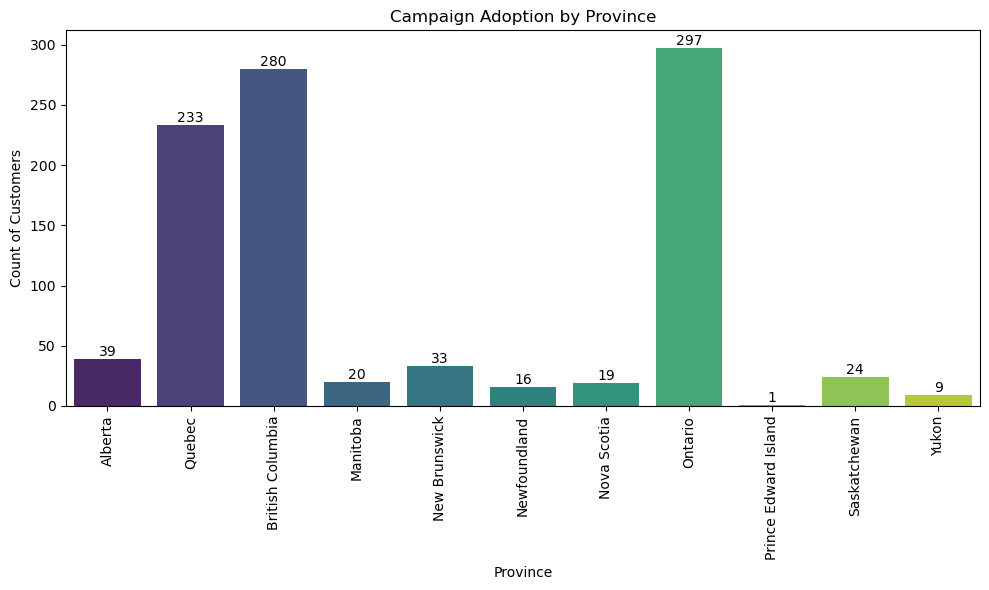

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for members who adopted the campaign
filtered_data = df1[df1['EnrollmentType'] == '2018 Promotion']

# Count plot to show campaign adoption by Province
plt.figure(figsize=(10, 6))
sns.countplot(x='Province', data=filtered_data, palette='viridis')

plt.title('Campaign Adoption by Province')
plt.xlabel('Province')
plt.ylabel('Count of Customers')

# Add count labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

> ***Explanation:***
- ***Strong Adoption in Ontario, Columbia, and Quebec:*** These provinces exhibited notable success in the campaign, accumulating between 233 to 297 new customers. This strong adoption highlights the effectiveness of the promotional efforts in these regions.

- ***Minimal impact in Prince Edward Island and Yukon:*** The campaign's impact was relatively less in Prince Edward Island and Yukon, reflecting lower customer adoption compared to other provinces. Further analysis could uncover reasons for this comparatively weaker response in these provinces.

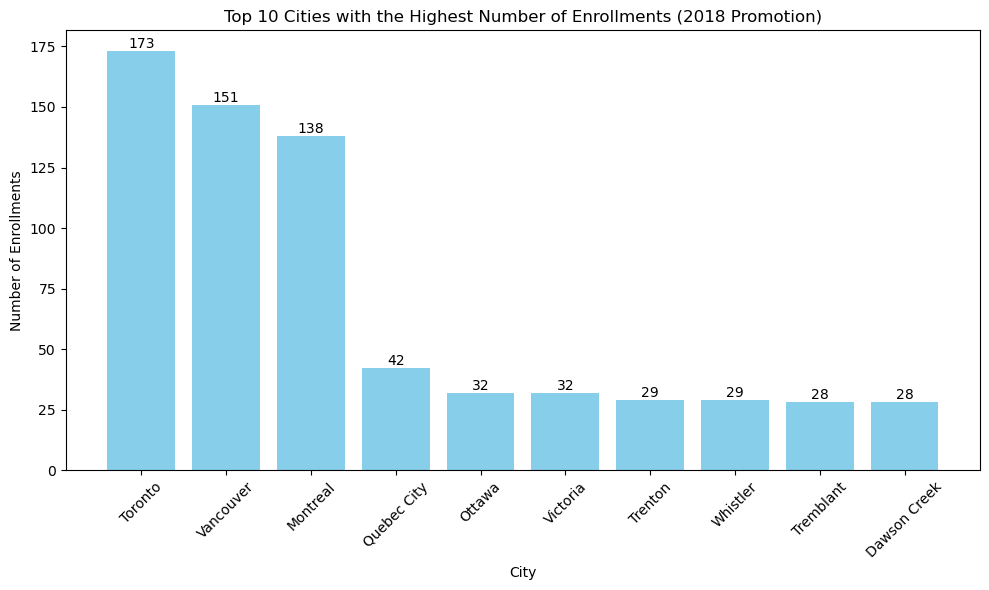

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 contains your dataset

# Filter the dataset for 'EnrollmentType' as '2018 Promotion'
promotion_2018 = df1[df1['EnrollmentType'] == '2018 Promotion']

# Grouping data by city and counting unique enrollments for each city within the promotion
city_enrollments = promotion_2018.groupby('City')['LoyaltyNumber'].nunique().sort_values(ascending=False).head(10)

# Plotting the top 10 cities with the highest number of enrollments in the '2018 Promotion' as a bar chart with data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(city_enrollments.index, city_enrollments, color='skyblue')

# Adding data labels in the center of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Number of Enrollments')
plt.title('Top 10 Cities with the Highest Number of Enrollments (2018 Promotion)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

> ***Explanation:***

- ***Toronto, Vancouver, and Montreal Lead Enrollment:*** These cities have shown the highest number of new customer enrollments through the campaign. 

- This trend indicates the effectiveness of the campaign strategy in attracting customers in these urban centers.

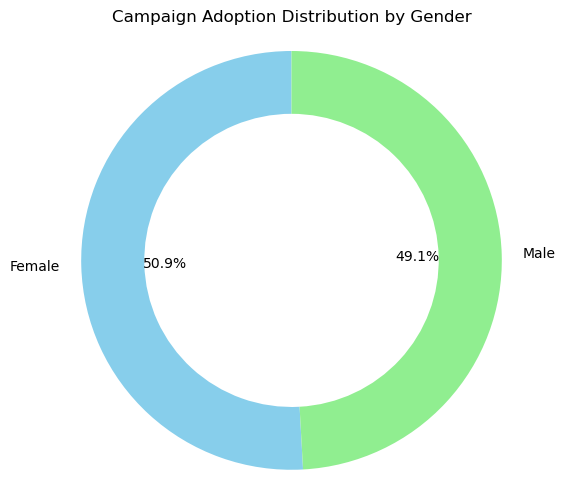

In [25]:
import matplotlib.pyplot as plt

# Filter data for members who adopted the campaign
filtered_data = df1[df1['EnrollmentType'] == '2018 Promotion']

# Counting campaign adoption by Gender
campaign_by_gender = filtered_data['Gender'].value_counts()

# Creating a donut chart for campaign adoption by Gender
plt.figure(figsize=(6, 6))

# Outer pie chart (to create the donut shape)
outer_colors = ['skyblue', 'lightgreen']  # Adjust colors if needed
plt.pie(campaign_by_gender, labels=campaign_by_gender.index, autopct='%1.1f%%', startangle=90, colors=outer_colors, wedgeprops=dict(width=0.3))

# Inner circle to create the hole in the center
inner_circle = plt.Circle((0, 0), 0.2, color='white')
plt.gca().add_artist(inner_circle)

plt.title('Campaign Adoption Distribution by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


> ***Explanation:***

- The campaign's adoption across genders appears balanced, suggesting that the promotional efforts were equally appealing and effective among both genders. 
- This gender-agnostic response might indicate the campaign's universal appeal or a well-targeted strategy that resonated equally across genders.

### Assessing the campaign's influence on flight bookings for summer 2018

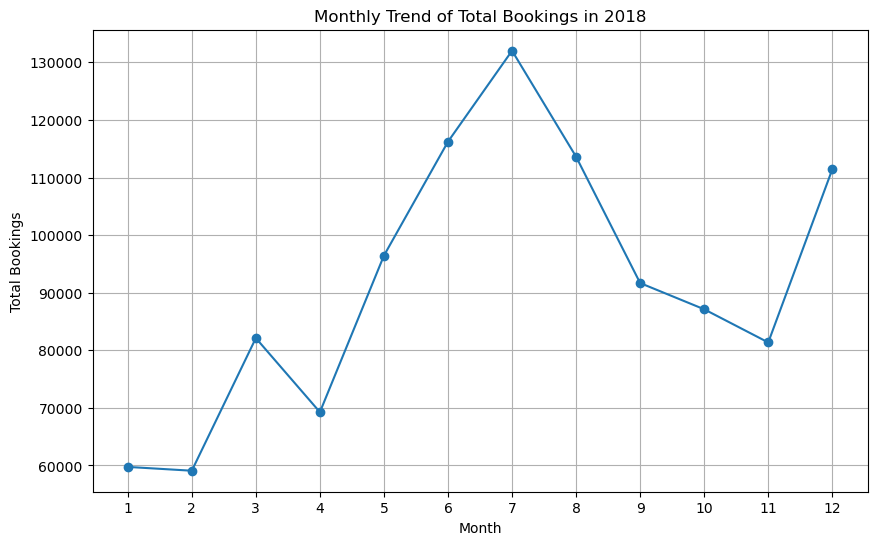

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter data for the year 2018
bookings_2018 = df2[df2['Year'] == 2018]

# Group and sum flights booked for each month in 2018
monthly_bookings_2018 = bookings_2018.groupby('Month')['TotalFlights'].sum()

# Plotting the trend of total bookings for each month in 2018 using a line chart
plt.figure(figsize=(10, 6))
monthly_bookings_2018.plot(kind='line', marker='o')
plt.title('Monthly Trend of Total Bookings in 2018')
plt.xlabel('Month')
plt.ylabel('Total Bookings')
plt.xticks(monthly_bookings_2018.index)  # Set x-axis ticks to the months
plt.grid(True)
plt.show()

> ***Explanation:***
- We can observe a **remarkable rise** in bookings from **April to July**, reaching its peak with over **130,000** bookings in the month of July, which highlights the campaign's significant impact on 2018 summer flight bookings. 
- The subsequent **decline** from **August to November** could potentially due to **seasonal patterns** or a **reduced promotional impact**. 
- Offering enticing deals during these periods could potentially invigorate customer interest, boosting both number of flight booking and overall revenue.

### Analysing Customer Churn

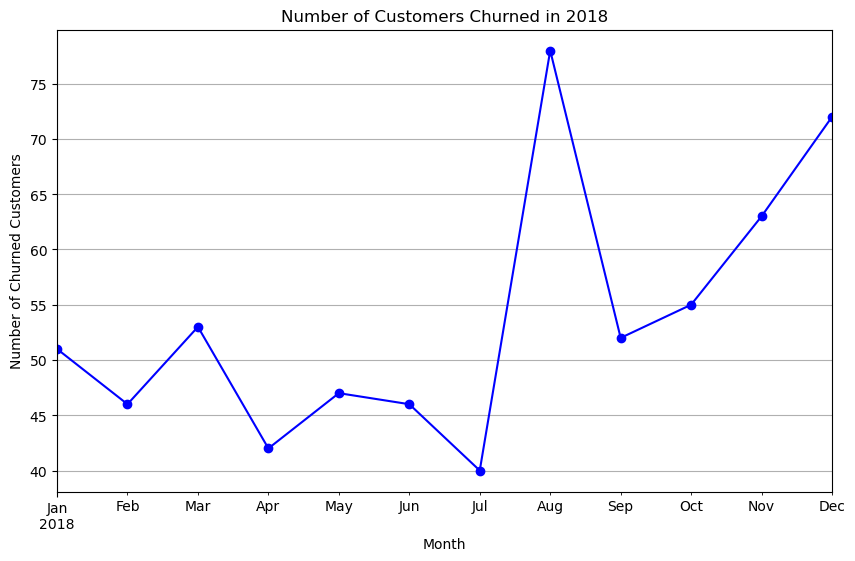

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter for rows where both EnrollmentDate and CancellationDate fall within 2018
churned_2018 = df1[
    (df1['CancellationDate'].dt.year == 2018)
]

# Group churned customers by month in 2018
monthly_churned_2018 = churned_2018['CancellationDate'].dt.to_period('M').value_counts().sort_index()

# Plotting the number of customers churned in 2018 over time
plt.figure(figsize=(10, 6))
monthly_churned_2018.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Churned Customers')
plt.title('Number of Customers Churned in 2018')
plt.grid(True)
plt.show()


> ***Explanation:***

- The data reveals a noteworthy pattern in customer churn, with peaks recorded notably in August and December. 
- This observation could signify a seasonal trend or specific external factors influencing customer attrition during these months. 
- Further investigation into these periods might uncover underlying causes or factors contributing to higher customer churn.
- Customer feedback can be helpful in understanding the reasons behind this attrition. 
- It can shed light on various aspects such as service quality, product offerings, pricing, or overall customer experience, aiding in identifying the reasons and implementing necessary improvements to reduce churn.

# 5. Conclusion:

- **Campaign Success:** The campaign between February and April resulted in a significant rise in loyalty program enrollments and flight bookings, indicating its success.
- **Membership Preferences:** The Star membership witnessed the highest enrollment, showcasing its popularity among customers.
- **Geographical Impact:** Certain regions, notably Ontario, British Columbia, and Quebec, showed higher campaign adoption, while others like Prince Edward Island and Yukon lagged.
- **Booking Trends:** There was a peak in bookings from April to July, possibly due to the campaign's influence during the summer months. However, a decline was observed later, possibly due to seasonal effects.
- **Churn Observations:** Customer churn rates were notably higher in August and December.

# 6. Recommendations:

- **Feedback Collection:** Solicit customer feedback to understand the reasons for churn, allowing for targeted improvements.
- **Seasonal Offers:** Introduce seasonal promotions or offers during periods of lower bookings to stimulate customer interest and increase revenue.
- **Region-Specific Strategies:** Tailor marketing strategies or campaigns to regions with lower adoption to improve reach and impact.
- **Continuous Monitoring:** Regularly track customer trends, feedback, and campaign impact to adapt strategies for better results.